In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Loading dataset
df = pd.read_csv('dataset.csv', usecols=[1,2,3,4], na_values=['nan', 'NaN'], header=None, skip_blank_lines=True)
df.columns = df.iloc[0]
df = df.drop([0])
df.dropna(inplace=True)
print(df)

#Train/Test splitting will be 80% Train, 20% Test
#first need to split into test and train

N_train, N_test = train_test_split(df, test_size=0.2, random_state=1)

print(N_train)
print(len(N_test))


0                                                  url  \
1    https://www.nscdscamps.org/blog/category/paren...   
2    https://howafrica.com/oscar-pistorius-attempts...   
3    http://washingtonsources.org/trump-votes-for-d...   
4    https://gloria.tv/video/yRrtUtTCfPga6cq2VDJPcgQe4   
5    http://blogs.trendolizer.com/2015/01/new-york-...   
6    https://web.archive.org/web/20171027105356/htt...   
7    https://web.archive.org/web/20170702174006/htt...   
8    http://beforeitsnews.com/opinion-conservative/...   
9    https://web.archive.org/web/20170731052757/htt...   
10   https://jis.gov.jm/president-trump-underscores...   
12   http://therightists.com/gretchen-carlson-the-2...   
13   https://web.archive.org/web/20180503143610/htt...   
14   http://www.breitbart.com/california/2017/10/17...   
15   https://www.politico.com/story/2017/05/09/trum...   
16   https://www.mirror.co.uk/news/us-news/there-bl...   
17   https://www.independent.co.uk/arts-entertainme...   
18   https://w

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
body_vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
title_vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')

# token_pattern='(?u)\b\w[\w-]*\w\b'

# Prefixing function
def prefix(array, prefix):
    result = []
    spl_str = array
    for i in spl_str:
        pref_str = ''
        i = i.split()
        for x in i:
            pref_str = pref_str + (prefix + x) + ' '
        #pref_str = [pref_str]
        result.append(pref_str)
    return result


# train data
train_title_array = np.array(N_train['title'])
train_title_array = prefix(train_title_array, 'title_')

train_text_array = np.array(N_train['text'])

train_text_array = body_vectorizer.fit_transform(train_text_array)
train_text_array = train_text_array.toarray()
train_title_array = title_vectorizer.fit_transform(train_title_array)
train_title_array = train_title_array.toarray()

X_train = np.concatenate((train_title_array, train_text_array), axis=1)
print(X_train)
print(len(train_title_array[0]))
print(len(train_text_array[0]))
print(len(X_train[0]))

# test data
test_title_array = np.array(N_test['title'])
test_title_array = prefix(test_title_array, 'title_')

test_text_array = np.array(N_test['text'])

test_text_array = body_vectorizer.transform(test_text_array)
test_text_array = test_text_array.toarray()
test_title_array = title_vectorizer.transform(test_title_array)
test_title_array = test_title_array.toarray()

X_test = np.concatenate((test_title_array, test_text_array), axis=1)
print(X_test)
print(len(X_test))


#false = 0, real = 1
y_train = np.array(N_train['label']).astype(int)
y_test = np.array(N_test['label']).astype(int)
y_train = y_train.ravel()
y_test = y_test.ravel()

#print(X_train)
#print(y_train)


# Trying to find keywords
text_feature_names = body_vectorizer.get_feature_names()

print(test_text_array.nonzero())
keywords = []
for col in test_text_array.nonzero()[1]:
    for x in range(0,20):
        if test_text_array[x, col] > 0.3:
            print(text_feature_names[col], ' - ', test_text_array[x, col])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2479
26625
29104
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
153
(array([  0,   0,   0, ..., 152, 152, 152]), array([  271,   348,   669, ..., 24590, 25926, 26256]))
applause  -  0.49548967906571917
applause  -  0.49548967906571917
fear  -  0.34518814419412946
mccain  -  0.5278342617548061
sign  -  0.3165530559968053
access  -  0.32973416036577907
sanders  -  0.5427120862131218
trump  -  0.35011845584255397
brady  -  0.30272884907963793
gun  -  0.3540415307342975
sanders  -  0.5427120862131218
tapper  -  0.45551623190475193
fear  -  0.34518814419412946
gun  -  0.3540415307342975
senators  -  0.40271950155981767
shame  -  0.443386047689729
filibuster  -  0.3708232148976563
immunity  -  0.47881923277412175
mccain  -  0.52783

In [109]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
test_proba = model.predict_proba(X_test)

print(model.feature_log_prob_.shape)


#print(test_proba)
print(test_pred)
print(y_test)

text = np.array(['trump'])
new_val = body_vectorizer.transform(text)
new_pred = model.predict(new_val)
print(new_pred)


(2, 29104)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
[1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 1 1]


ValueError: dimension mismatch

In [5]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print('Accuracy score: ', accuracy_score(y_test, test_pred))
print('Precision score: ', precision_score(y_test, test_pred))
print('Recall score: ', recall_score(y_test, test_pred))
print('F-1 score: ', f1_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Accuracy score:  0.7058823529411765
Precision score:  0.6923076923076923
Recall score:  0.99
F-1 score:  0.8148148148148148
             precision    recall  f1-score   support

          0       0.90      0.17      0.29        53
          1       0.69      0.99      0.81       100

avg / total       0.76      0.71      0.63       153



In [6]:
# Pickling the model
import pickle

pickle.dump(model, open('model.pickle', 'wb'))
pickle.dump(title_vectorizer, open('title_vectorizer.pickle', 'wb'))
pickle.dump(body_vectorizer, open('body_vectorizer.pickle', 'wb'))


In [7]:
# Preparing data for histogram

# put everything into one dataframe for ease of use
proba_df = pd.DataFrame(test_proba, columns=['false', 'true'])
accuracy_list = list(zip(test_pred, y_test))
df2 = pd.DataFrame(accuracy_list, columns=['prediction', 'ground_truth'])
proba_df = proba_df.join(df2)

x = 0
y_axis = []
for i in range(0, 9):
    proba_df_subset = proba_df[(x < proba_df['false']) & (proba_df['false'] < (x + 0.1)) 
                                                          & (proba_df['ground_truth'] == 0)]
    print(proba_df_subset)
    num = accuracy_score(proba_df_subset['ground_truth'], proba_df_subset['prediction'])
    y_axis.append(num)
    x += 0.1
    
class_prob = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
    
print(y_axis)
print(class_prob)


        false      true  prediction  ground_truth
9    0.033777  0.966223           1             0
60   0.022170  0.977830           1             0
83   0.077801  0.922199           1             0
97   0.078607  0.921393           1             0
124  0.070278  0.929722           1             0
130  0.082263  0.917737           1             0
132  0.058455  0.941545           1             0
135  0.037707  0.962293           1             0
        false      true  prediction  ground_truth
27   0.123230  0.876770           1             0
30   0.147331  0.852669           1             0
37   0.109410  0.890590           1             0
42   0.120123  0.879877           1             0
76   0.121810  0.878190           1             0
82   0.149642  0.850358           1             0
85   0.156252  0.843748           1             0
89   0.122745  0.877255           1             0
92   0.106292  0.893708           1             0
114  0.168743  0.831257           1             0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


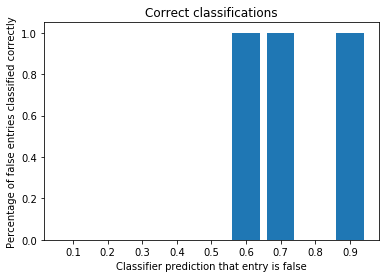

In [8]:
# Generating first histogram
import matplotlib.pyplot as plt
%matplotlib inline


n_bins = np.arange(len(class_prob))
plt.bar(n_bins, y_axis)
plt.xlabel('Classifier prediction that entry is false')
plt.ylabel('Percentage of false entries classified correctly')
plt.title('Correct classifications')
plt.xticks(n_bins, class_prob)

plt.show()

In [9]:
import math


log_class_prob = []
for i in test_proba:
    log_class_prob.append(math.log(i[1]/i[0]))

#class_prob = sorted(class_prob)

#print(class_prob)

#pred_list = proba_df['prediction']
#truth_list = proba_df['ground_truth']

class_prob_df = pd.DataFrame(log_class_prob, columns=['log_class_prob'])
#print(len(proba_df))
print(len(log_class_prob))

#full_df = proba_df.insert(4, 'log_class_prob', log_class_prob)
#print(full_df)
full_df = proba_df.merge(class_prob_df, left_index=True, right_index=True)
print(full_df)



153
        false      true  prediction  ground_truth  log_class_prob
0    0.000047  0.999953           1             1        9.958151
1    0.301724  0.698276           1             0        0.839102
2    0.042630  0.957370           1             1        3.111634
3    0.029738  0.970262           1             1        3.485130
4    0.008815  0.991185           1             1        4.722457
5    0.049101  0.950899           1             1        2.963519
6    0.003613  0.996387           1             1        5.619477
7    0.362014  0.637986           1             0        0.566632
8    0.075188  0.924812           1             1        2.509593
9    0.033777  0.966223           1             0        3.353622
10   0.030595  0.969405           1             1        3.455851
11   0.000032  0.999968           1             1       10.334419
12   0.040492  0.959508           1             1        3.165310
13   0.000303  0.999697           1             1        8.100033
14   0

In [10]:
bins = np.array([-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0])
full_df['bucket'] = pd.cut(full_df['log_class_prob'], bins)
full_df.sort_values(by=['bucket'], inplace=True)
    
print(full_df)

chart_df = pd.DataFrame({'bucket':full_df.bucket.unique()})
print(chart_df)

prop_false = []
prop_true = []

false_list = []
true_list = []
for i, row, in chart_df.iterrows():
    # [bucket, num_false, num_true, prop_gt_false, prop_gt_true]
    num_false = 0
    num_true = 0
    prop_gt_false = 0
    prop_gt_true = 0
    total_num = 0
    val2 = chart_df.iloc[i].left
    for index, row in full_df.iterrows():
        val1 = full_df.iloc[index]['bucket'].left
        if val1 == val2:
            total_num += 1
            # numbers for stacked bar chart
            if full_df.iloc[index]['ground_truth'] == 0:
                prop_gt_false += 1
            elif full_df.iloc[index]['ground_truth'] == 1:
                prop_gt_true += 1
            
            
            # numbers for line plot
            if (full_df.iloc[index]['prediction'] == 0) and (full_df.iloc[index]['ground_truth'] == 0):
                num_false += 1
            elif (full_df.iloc[index]['prediction'] == 1) and (full_df.iloc[index]['ground_truth'] == 1):
                num_true += 1
    
    print(total_num)
    
    prop_false.append(prop_gt_false/total_num)
    prop_true.append(prop_gt_true/total_num)
    
    false_list.append(num_false/total_num)
    true_list.append(num_true/total_num)
    
    
chart_df.insert(1, 'num_false', false_list)
chart_df.insert(2, 'num_true', true_list)
chart_df.insert(3, 'prop_gt_false', prop_false)
chart_df.insert(4, 'prop_gt_true', prop_true)


print(chart_df)


        false      true  prediction  ground_truth  log_class_prob  \
117  0.882612  0.117388           0             0       -2.017404   
17   0.842918  0.157082           0             0       -1.680099   
48   0.644064  0.355936           0             0       -0.593046   
109  0.532679  0.467321           0             0       -0.130902   
14   0.660879  0.339121           0             0       -0.667213   
73   0.505861  0.494139           0             0       -0.023444   
107  0.660137  0.339863           0             0       -0.663903   
21   0.522345  0.477655           0             1       -0.089439   
59   0.653171  0.346829           0             0       -0.633008   
34   0.582072  0.417928           0             0       -0.331286   
62   0.329510  0.670490           1             1        0.710401   
67   0.380869  0.619131           1             0        0.485861   
142  0.479923  0.520077           1             0        0.080351   
68   0.317350  0.682650           

-3.0 to -2.0
1.0
-2.0 to -1.0
1.0
-1.0 to 0.0
0.875
0.0 to 1.0
0.05555555555555555
1.0 to 2.0
0.30434782608695654
2.0 to 3.0
0.6666666666666666
3.0 to 4.0
0.85
4.0 to 5.0
1.0
5.0 to 6.0
1.0
6.0 to 7.0
1.0
7.0 to 8.0
1.0
8.0 to 9.0
1.0
9.0 to 10.0
1.0
10.0 to 11.0
1.0
11.0 to 12.0
1.0
12.0 to 13.0
1.0
13.0 to 14.0
1.0
['-3.0 to -2.0', '-2.0 to -1.0', '-1.0 to 0.0', '0.0 to 1.0', '1.0 to 2.0', '2.0 to 3.0', '3.0 to 4.0', '4.0 to 5.0', '5.0 to 6.0', '6.0 to 7.0', '7.0 to 8.0', '8.0 to 9.0', '9.0 to 10.0', '10.0 to 11.0', '11.0 to 12.0', '12.0 to 13.0', '13.0 to 14.0']
[1.0, 1.0, 0.875, 0.05555555555555555, 0.30434782608695654, 0.6666666666666666, 0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


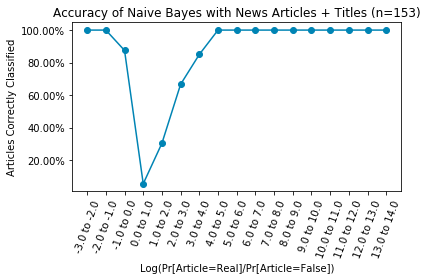

In [11]:
# Transforming into usable 1D arrays
import seaborn as sns
x = []
y = []
y_prop_f = []
y_prop_t = []
for i, rows in chart_df.iterrows():
    bucket = chart_df.at[i, 'bucket']
    bucket_string = str(bucket.left) + ' to ' + str(bucket.right)
    print(bucket_string)
    x.append(bucket_string)
    
    y_val = chart_df.at[i, 'num_false'] + chart_df.at[i, 'num_true']
    print(y_val)
    y.append(y_val)
    
    y_prop_f.append(chart_df.at[i, 'prop_gt_false'])
    y_prop_t.append(chart_df.at[i, 'prop_gt_true'])

    
    
print(x)
print(y)

# Generating line plot
fig = plt.figure()
plt.title('Accuracy of Naive Bayes with News Articles + Titles (n=153)')
plt.xlabel('Log(Pr[Article=Real]/Pr[Article=False])')
plt.xticks(rotation=70)
plt.ylabel('Articles Correctly Classified')

#plt.style.use('fivethirtyeight')
ax = plt.axes()
ax.grid(False)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.plot(x, y, color='#0084b4', marker='o')

'''
index = [i for i,_ in enumerate(x)]
print(index)
for x, y in zip(index, y):
    label = "{:.4f}".format(y)
    print(label)
    plt.annotate(label, # this is the text
                 (index,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
'''

plt.tight_layout()
plt.savefig('line_plot.jpg', dpi=1200)

plt.show()



[0.0, 0.0, 0.125, 0.05555555555555555, 0.30434782608695654, 0.6666666666666666, 0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 0.875, 0.9444444444444444, 0.6956521739130435, 0.3333333333333333, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


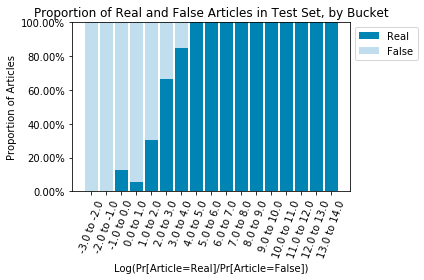

In [12]:
# Setting up stacked bar chart
from matplotlib.colors import ListedColormap
print(y_prop_t)
print(y_prop_f)

bar_width = 0.85
p1 = plt.bar(x, y_prop_t, bar_width, color='#0084b4')
p2 = plt.bar(x, y_prop_f, bar_width, bottom=y_prop_t, color='#c0deed')
plt.xticks(rotation=70)
plt.legend((p1[0], p2[0]), ('Real', 'False'), bbox_to_anchor=(1,1))

ax = plt.axes()
ax.grid(False)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.title('Proportion of Real and False Articles in Test Set, by Bucket')
plt.xlabel('Log(Pr[Article=Real]/Pr[Article=False])')
plt.xticks(rotation=70)
plt.ylabel('Proportion of Articles')

plt.tight_layout()
plt.savefig('stacked_bar.jpg', dpi=1200)

plt.show()


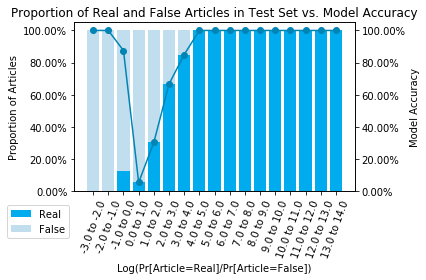

In [83]:
#combined chart
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


bar_width = 0.8
p1 = ax1.bar(x, y_prop_t, bar_width, color='#00aced', align='center')
p2 = ax1.bar(x, y_prop_f, bar_width, bottom=y_prop_t, color='#c0deed', align='center')

ax2.set_xticklabels(x, fontdict=None, minor=False)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
ax2.grid(b=False)
ax1.grid(b=False)

vals = ax1.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2.set_title('Proportion of Real and False Articles in Test Set vs. Model Accuracy')
ax1.set_ylabel('Proportion of Articles')
ax2.set_ylabel('Model Accuracy')
ax1.set_xlabel('Log(Pr[Article=Real]/Pr[Article=False])')


#ax2.set_xmargin(0.1)
#ax1.set_xmargin(0.1)

ax1.set_ylim(top=1.05)
ax2.set_ylim(top=1.05)

plt.tight_layout()

ax2.plot(x, y, color='#0084b4', marker='o')

ax1.legend((p1[0], p2[0]), ('Real', 'False'), bbox_to_anchor=(0,-0.05))

plt.savefig('combined_chart.jpg', dpi=1200)
